In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('bengaluru_house.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df = df.drop(['society', 'balcony', 'availability'], axis=1)

In [5]:
df = df.dropna()  # Removes rows with any missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   price       13246 non-null  float64
dtypes: float64(2), object(4)
memory usage: 724.4+ KB


In [7]:
df.isna()

,area_type,location,size,total_sqft,bath,price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
13315,False,False,False,False,False,False
13316,False,False,False,False,False,False
13317,False,False,False,False,False,False
13318,False,False,False,False,False,False


In [8]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis=1)

In [9]:
print(df.head(10))

              area_type                  location total_sqft  bath   price  \
0  Super built-up  Area  Electronic City Phase II       1056   2.0   39.07   
1            Plot  Area          Chikka Tirupathi       2600   5.0  120.00   
2        Built-up  Area               Uttarahalli       1440   2.0   62.00   
3  Super built-up  Area        Lingadheeranahalli       1521   3.0   95.00   
4  Super built-up  Area                  Kothanur       1200   2.0   51.00   
5  Super built-up  Area                Whitefield       1170   2.0   38.00   
6  Super built-up  Area          Old Airport Road       2732   4.0  204.00   
7  Super built-up  Area              Rajaji Nagar       3300   4.0  600.00   
8  Super built-up  Area              Marathahalli       1310   3.0   63.25   
9            Plot  Area              Gandhi Bazar       1020   6.0  370.00   

   bhk  
0    2  
1    4  
2    3  
3    3  
4    2  
5    2  
6    4  
7    4  
8    3  
9    6  


In [10]:
#THIS IS FOR COPNVERTING TOTAL_SQUAREFIT INTO NUMERICAL VALUE
def convert_sqft(x):#  
    try:
        return float(x)
    except:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return None

In [11]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna(subset=['total_sqft'])  # Drop rows where conversion failed


In [17]:
df = df[df['bhk'] != 0]  # Safe guard against division by zero
df = df[~(df['total_sqft'] / df['bhk'] < 300)]

In [18]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']


In [19]:
df_clean = df.copy()


In [20]:
df['location'] = df['location'].apply(lambda x: x.strip())  # Remove extra spaces
location_stats = df['location'].value_counts()
location_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)


In [15]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   location        13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 825.0+ KB


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


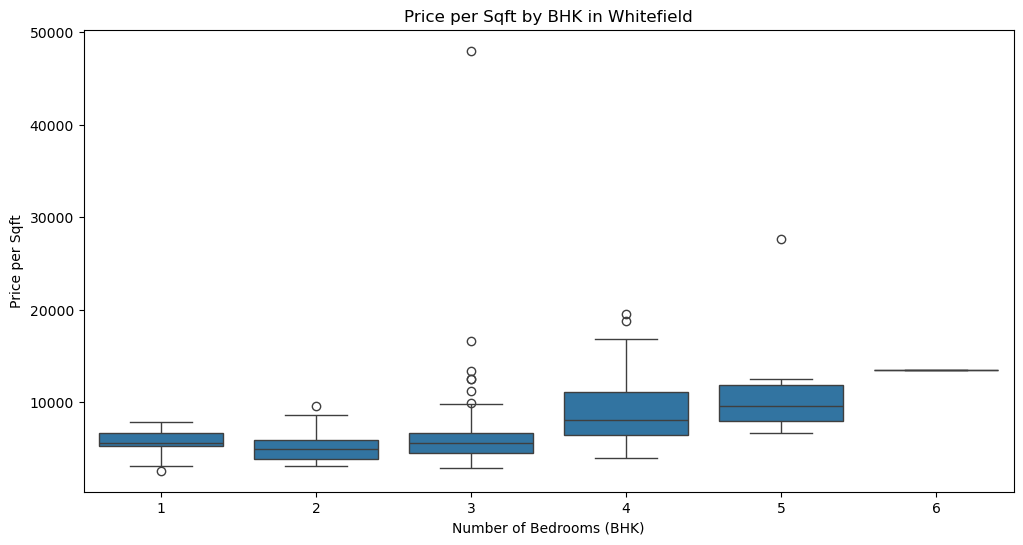

In [21]:
plt.figure(figsize=(12, 6))
location_group = df[df['location'] == 'Whitefield']  # change location name as needed
sns.boxplot(data=location_group, x='bhk', y='price_per_sqft')
plt.title("Price per Sqft by BHK in Whitefield")
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Price per Sqft")
plt.show()

In [22]:
df_cleand = df.copy()

In [24]:
#one hotencoding

dummies = pd.get_dummies(df['location'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('location', axis=1)


KeyError: 'location'

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 12456 entries, 0 to 13319
Columns: 228 entries, area_type to other
dtypes: bool(222), float64(4), int64(1), object(1)
memory usage: 3.3+ MB


,area_type,total_sqft,bath,price,bhk,price_per_sqft,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,1056.0,2.0,39.07,2,3699.810606,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,2600.0,5.0,120.00,4,4615.384615,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Built-up Area,1440.0,2.0,62.00,3,4305.555556,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,1521.0,3.0,95.00,3,6245.890861,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,1200.0,2.0,51.00,2,4250.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
area_dummies = pd.get_dummies(df['area_type'], drop_first=True)
df = pd.concat([df.drop('area_type', axis=1), area_dummies], axis=1)


In [28]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [29]:
X = df.drop(['price', 'price_per_sqft'], axis=1)  # Features
y = df['price']                                   # Target


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
df_cleaned = df.copy()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lr = model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("🔍 Linear Regression Evaluation:")
print("MAE :", mae_lr)
print("MSE :", mse_lr)
print("RMSE:", rmse_lr)
print("R²   :", r2_lr)



🔍 Linear Regression Evaluation:
MAE : 43.89967503763125
MSE : 11014.130707171607
RMSE: 104.94822869954312
R²   : 0.5493531477556239


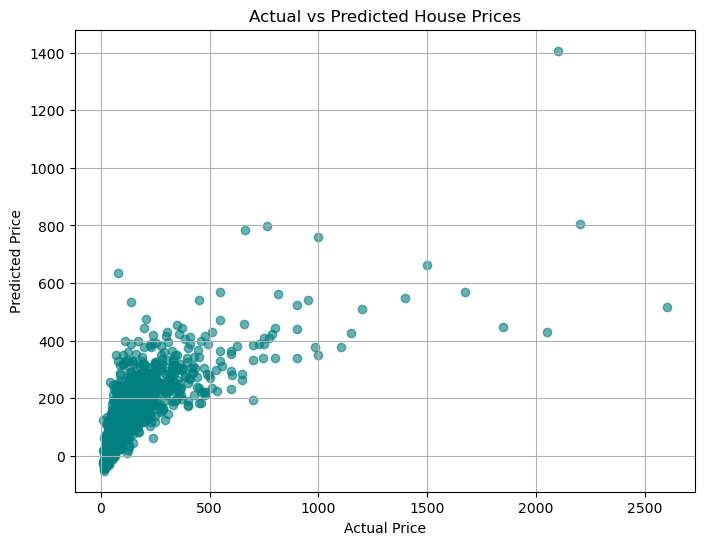

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


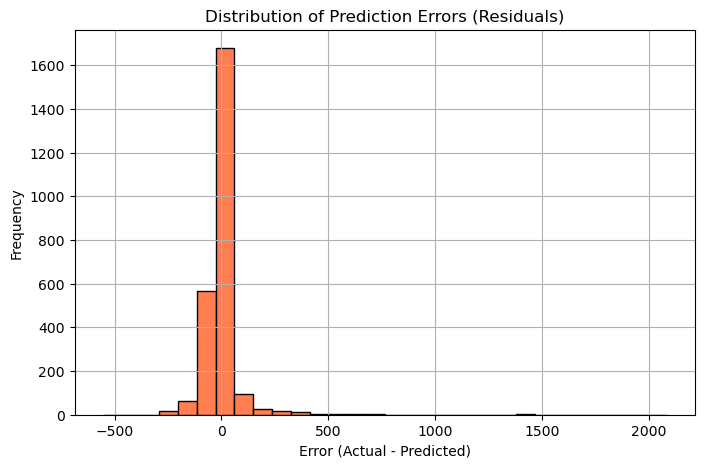

In [37]:
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='coral', edgecolor='black')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicted values (you've already got this)
y_pred_rf = rf.predict(X_test)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("🔍 Random Forest Evaluation:")
print("MAE :", mae_rf)
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("R²   :", r2_rf)



🔍 Random Forest Evaluation:
MAE : 33.18153874851782
MSE : 9269.954363788958
RMSE: 96.28060221970445
R²   : 0.6207167078768694


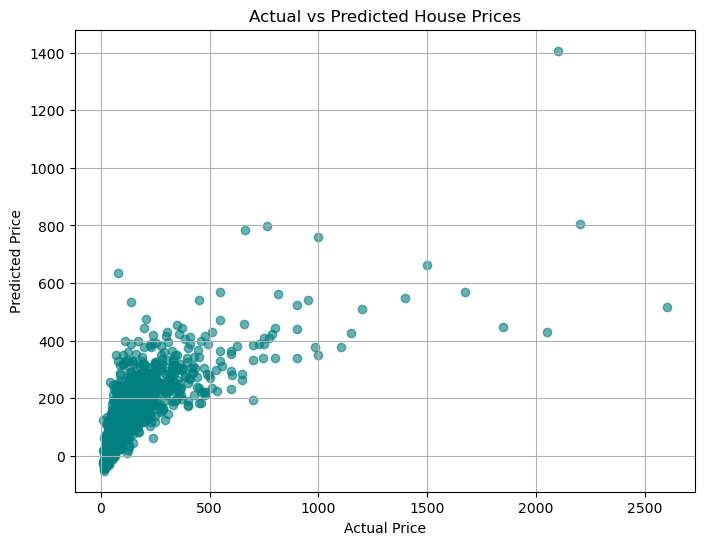

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


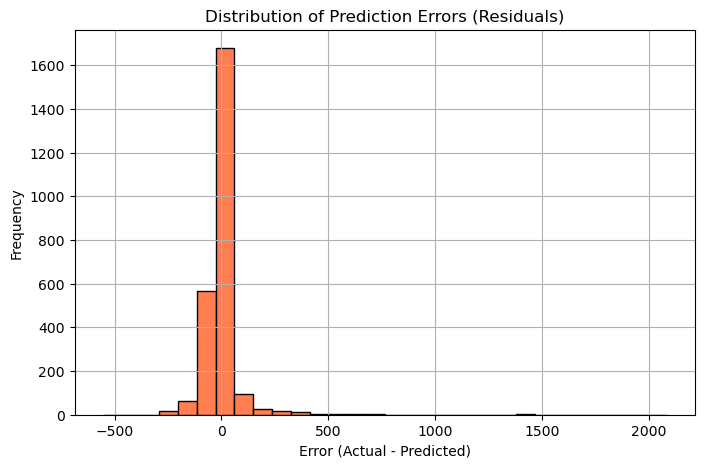

In [38]:
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='coral', edgecolor='black')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [43]:
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("🔍 Lasso Regression Evaluation:")
print("MAE :", mae_lasso)
print("MSE :", mse_lasso)
print("RMSE:", rmse_lasso)
print("R²   :", r2_lasso)


🔍 Lasso Regression Evaluation:
MAE : 44.96183554613085
MSE : 11872.808798210812
RMSE: 108.96241920135039
R²   : 0.5142200456428928


In [44]:
df_traind = df.copy()

In [48]:
!pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 487.6 kB/s eta 0:05:08
   ---------------------------------------- 0.1/150.0 MB 1.0 MB/s eta 0:02:27
   ---------------------------------------- 0.2/150.0 MB 1.0 MB/s eta 0:02:24
   ---------------------------------------- 0.2/150.0 MB 980.4 kB/s eta 0:02:33
   ---------------------------------------- 0.2/150.0 MB 981.9 kB/s eta 0:02:33
   ---------------------------------------- 0.3/150.0 MB 896.4 kB/s eta 0:02:47
   ---------------------------------------- 0.4/150.0 MB 1.0 MB/s eta 0:02:24
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 0.6/150.0 MB 1.2 MB/s eta 0:02:01
   ---------------------------------------- 0.7/150.0 MB 1.4 MB/s eta 0:01:47



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------- ------------------------- 53.4/150.0 MB 631.3 kB/s eta 0:02:33
   ------------- ------------------------- 53.4/150.0 MB 630.7 kB/s eta 0:02:34
   ------------- ------------------------- 53.4/150.0 MB 629.5 kB/s eta 0:02:34
   ------------- ------------------------- 53.5/150.0 MB 627.7 kB/s eta 0:02:34
   ------------- ------------------------- 53.5/150.0 MB 627.1 kB/s eta 0:02:34
   ------------- ------------------------- 53.5/150.0 MB 626.5 kB/s eta 0:02:34
   ------------- ------------------------- 53.5/150.0 MB 624.1 kB/s eta 0:02:35
   ------------- ------------------------- 53.5/150.0 MB 622.4 kB/s eta 0:02:35
   ------------- ------------------------- 53.5/150.0 MB 621.2 kB/s eta 0:02:36
   ------------- ------------------------- 53.6/150.0 MB 620.6 kB/s eta 0:02:36
   ------------- ------------------------- 53.6/150.0 MB 620.6 kB/s eta 0:02:36
   ------------- ------------------------- 53.6/150.0 MB 619.4 kB/s eta 0:02:36
   ------------- -----------------------

In [50]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)



In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

# Print metrics
print("XGBoost Evaluation Metrics:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


XGBoost Evaluation Metrics:
MAE : 32.90534269395647
MSE : 8638.928354489117
RMSE: 92.94583559519553
R² Score: 0.6465353487061583


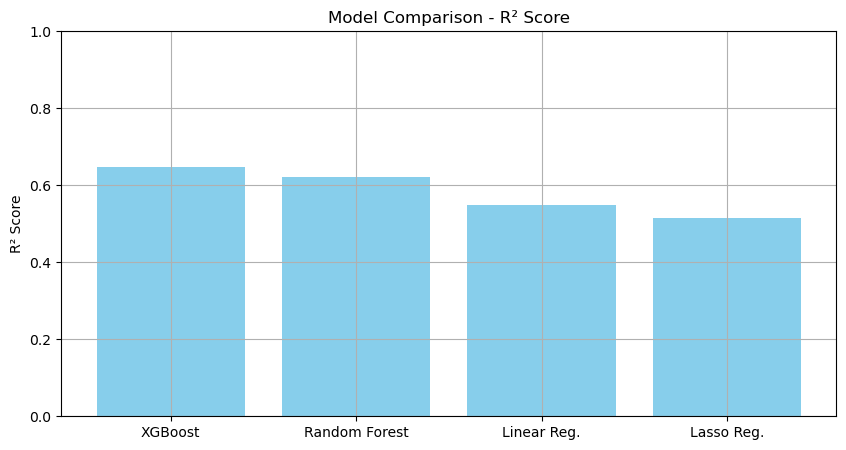

In [52]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'Random Forest', 'Linear Reg.', 'Lasso Reg.']
r2_scores = [0.647, 0.621, 0.549, 0.514]
rmse_scores = [92.95, 96.28, 104.95, 108.96]

plt.figure(figsize=(10,5))
plt.bar(models, r2_scores, color='skyblue')
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


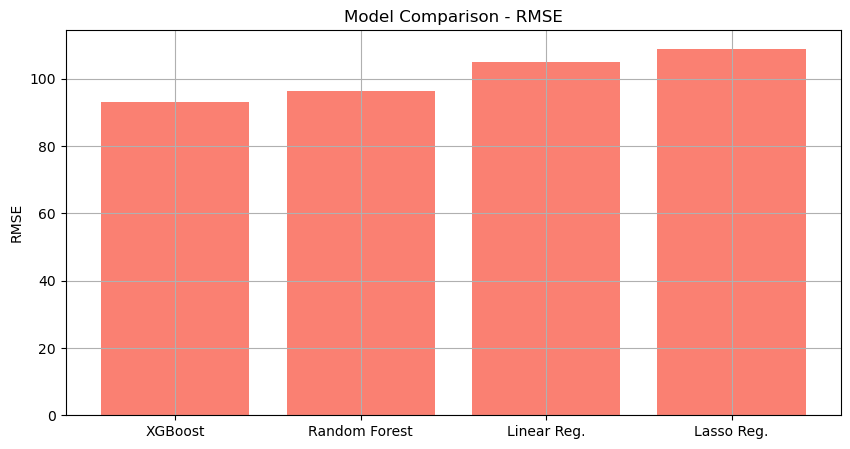

In [53]:
plt.figure(figsize=(10,5))
plt.bar(models, rmse_scores, color='salmon')
plt.ylabel("RMSE")
plt.title("Model Comparison - RMSE")
plt.grid(True)
plt.show()


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np


In [55]:
def evaluate_model_cv(model, name):
    scores = cross_val_score(model, X_train, y_train, 
                             scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print(f"🔍 {name} Cross-Validation Results:")
    print(f"RMSE Scores (5 folds): {rmse_scores}")
    print(f"Mean RMSE: {rmse_scores.mean():.2f}")
    print(f"Standard Deviation: {rmse_scores.std():.2f}")
    print("-" * 50)


In [56]:
evaluate_model_cv(LinearRegression(), "Linear Regression")
evaluate_model_cv(Lasso(), "Lasso Regression")
evaluate_model_cv(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")
evaluate_model_cv(XGBRegressor(n_estimators=100, random_state=42), "XGBoost")


🔍 Linear Regression Cross-Validation Results:
RMSE Scores (5 folds): [118.17792444 123.72979187  84.00967939  97.67305385 148.93528186]
Mean RMSE: 114.51
Standard Deviation: 22.35
--------------------------------------------------
🔍 Lasso Regression Cross-Validation Results:
RMSE Scores (5 folds): [124.55181024 123.66437511  89.47694693 103.20258382 154.27967301]
Mean RMSE: 119.04
Standard Deviation: 21.99
--------------------------------------------------
🔍 Random Forest Cross-Validation Results:
RMSE Scores (5 folds): [ 98.29214995 102.3255408  100.98657537  92.79366019 112.37879925]
Mean RMSE: 101.36
Standard Deviation: 6.41
--------------------------------------------------
🔍 XGBoost Cross-Validation Results:
RMSE Scores (5 folds): [ 95.22267736  96.23218355  93.44288638 107.66714634 114.66880165]
Mean RMSE: 101.45
Standard Deviation: 8.29
--------------------------------------------------


In [58]:
final_model = xgb  #   here i am choosing the best model or rf


In [59]:
import joblib
joblib.dump(final_model, 'house_price_model.pkl')


['house_price_model.pkl']

In [60]:
df_crossvd = df.copy()

In [61]:
import joblib

# Load the saved model
model = joblib.load('house_price_model.pkl')


In [62]:
import numpy as np

# Prediction function
def predict_price(model, total_sqft, bath, bhk, location_name, feature_columns):
    x = np.zeros(len(feature_columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    loc_index = np.where(feature_columns == location_name)[0]
    if len(loc_index) > 0:
        x[loc_index[0]] = 1
    return model.predict([x])[0]


In [63]:
print(X.columns)


Index(['total_sqft', 'bath', 'bhk', '2nd Phase Judicial Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'],
      dtype='object', length=228)


In [64]:
print(predict_price(model, 1200, 2, 2, 'Whitefield', X.columns))


60.6613
